# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print('Beginning Data Retrieval')     
print('-----------------------------')
cities_weather = []

count = 0
set_count = 1

for city in cities:
    count+=1
    print(f'Processing Record {count} of Set {set_count} | {city}')
    
    if(count == 50):
        count = 0
        set_count+=1
        
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={weather_api_key}&units=imperial&q={city}"
    response = rq.get(query_url).json()
    try:
        cities_weather.append({'City':city,
                              'Lat':response['coord']['lat'],
                              'Lon':response['coord']['lon'],
                              'Temp':response['main']['temp'],
                              'Humidity':response['main']['humidity'],
                              'Wind Speed':response['wind']['speed'],
                               'Cloudiness':response['clouds']['all'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kushiro
Processing Record 10 of Set 1 | dicabisagan
Processing Record 11 of Set 1 | saryg-sep
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | mitsamiouli
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | kaa

Processing Record 42 of Set 4 | taoudenni
Processing Record 43 of Set 4 | colwyn bay
Processing Record 44 of Set 4 | araouane
Processing Record 45 of Set 4 | ayorou
Processing Record 46 of Set 4 | utiroa
City not found. Skipping...
Processing Record 47 of Set 4 | badulla
Processing Record 48 of Set 4 | flers
Processing Record 49 of Set 4 | port-cartier
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | zhanakorgan
Processing Record 2 of Set 5 | qandala
Processing Record 3 of Set 5 | muravlenko
Processing Record 4 of Set 5 | krasnaya gorka
Processing Record 5 of Set 5 | yangambi
Processing Record 6 of Set 5 | mago
Processing Record 7 of Set 5 | sayyan
Processing Record 8 of Set 5 | vorsma
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | saint-pierre
Processing Record 11 of Set 5 | ballina
Processing Record 12 of Set 5 | codrington
Processing Record 13 of Set 5 | severo-kurilsk
Processing Record 14 of Set 5 | mountain home
Processing Record 15 of S

Processing Record 32 of Set 8 | lubao
Processing Record 33 of Set 8 | japura
Processing Record 34 of Set 8 | manoel urbano
Processing Record 35 of Set 8 | segovia
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | mehran
Processing Record 38 of Set 8 | bo rai
Processing Record 39 of Set 8 | sao joao da barra
Processing Record 40 of Set 8 | abonnema
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | windsor
Processing Record 43 of Set 8 | mitu
Processing Record 44 of Set 8 | zyryanka
Processing Record 45 of Set 8 | mocuba
Processing Record 46 of Set 8 | fare
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | carupano
Processing Record 49 of Set 8 | ostrovnoy
Processing Record 50 of Set 8 | ocos
Processing Record 1 of Set 9 | goundi
Processing Record 2 of Set 9 | krasnyy chikoy
Processing Record 3 of Set 9 | xai-xai
Processing Record 4 of Set 9 | anjozorobe
Processing Record 5 of Set 9 | mendahara
City not found. Skipping...
P

Processing Record 17 of Set 12 | tiznit
Processing Record 18 of Set 12 | hue
Processing Record 19 of Set 12 | winburg
Processing Record 20 of Set 12 | rancho palos verdes
Processing Record 21 of Set 12 | shakawe
Processing Record 22 of Set 12 | plouzane
Processing Record 23 of Set 12 | hingoli
Processing Record 24 of Set 12 | zabid
Processing Record 25 of Set 12 | taizhou
Processing Record 26 of Set 12 | vanavara
Processing Record 27 of Set 12 | sao felipe
Processing Record 28 of Set 12 | bayan
Processing Record 29 of Set 12 | zarubino
Processing Record 30 of Set 12 | yeppoon
Processing Record 31 of Set 12 | baykit
Processing Record 32 of Set 12 | samana
Processing Record 33 of Set 12 | the valley
Processing Record 34 of Set 12 | sao felix do xingu
Processing Record 35 of Set 12 | ilulissat
Processing Record 36 of Set 12 | barra patuca
Processing Record 37 of Set 12 | awjilah
Processing Record 38 of Set 12 | harper
Processing Record 39 of Set 12 | champerico
Processing Record 40 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_weather_df.to_csv('Cities_Weather.csv')

In [10]:
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df

,City,Lat,Lon,Temp,Humidity,Wind Speed,Cloudiness,Date
0,qaanaaq,77.48,-69.36,43.97,59,3.36,0,1595852357
1,faanui,-16.48,-151.75,78.98,81,15.32,92,1595852357
2,punta arenas,-53.15,-70.92,39.09,80,31.09,40,1595852215
3,hasaki,35.73,140.83,78.85,83,2.24,75,1595852357
4,albany,42.60,-73.97,73.81,60,4.27,29,1595852357
...,...,...,...,...,...,...,...,...
543,barra patuca,15.80,-84.28,78.94,87,6.20,95,1595852421
544,awjilah,29.11,21.29,100.06,17,7.85,0,1595852422
545,harper,4.38,-7.72,77.43,76,12.12,94,1595852422
546,champerico,14.30,-91.92,77.25,85,8.68,50,1595852422


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
cities_weather_df.loc[cities_weather_df['Humidity'] > 100] 
                                                

,City,Lat,Lon,Temp,Humidity,Wind Speed,Cloudiness,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

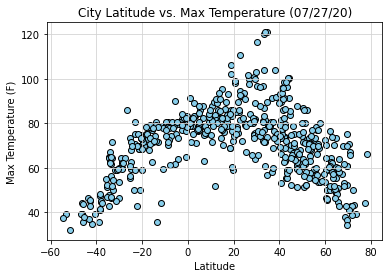

In [38]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/latvstemp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

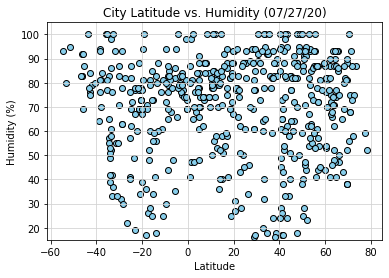

In [39]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/latvshumid_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

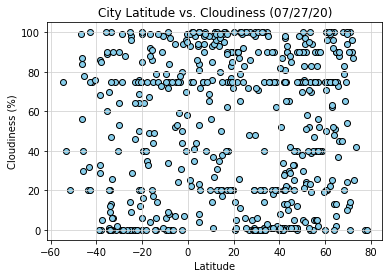

In [40]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

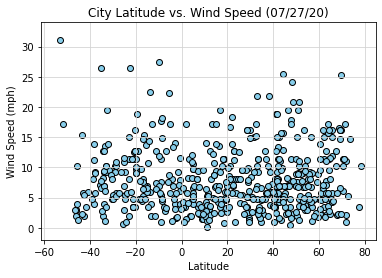

In [41]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/windspeed_plot.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [28]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hem_df = cities_weather_df.loc[cities_weather_df['Lat'] > 0]
Southern_hem_df = cities_weather_df.loc[cities_weather_df['Lat'] < 0]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.3601038768127042


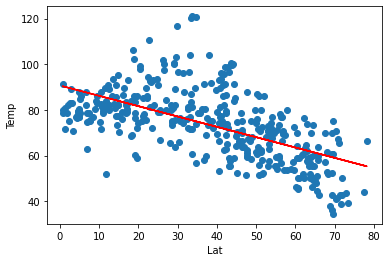

In [42]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvstemp_regress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.665752184890373


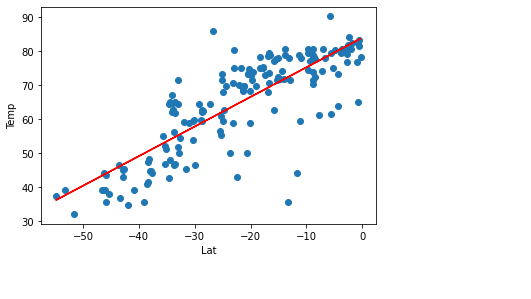

In [43]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvstemp_regress2.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.00012249291217247032


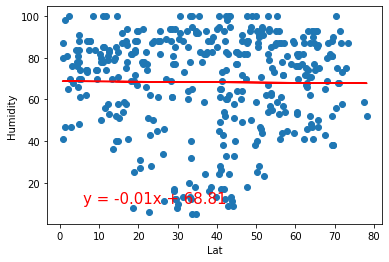

In [44]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvshumid_regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.005756002788339375


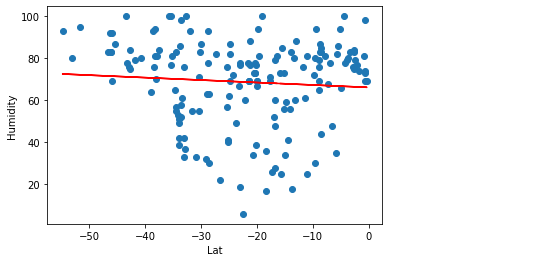

In [45]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvshumid_regress2.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.01004154261273761


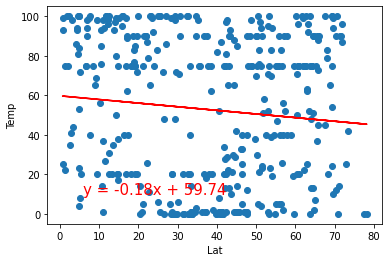

In [46]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvscloudiness_regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.007487060487346795


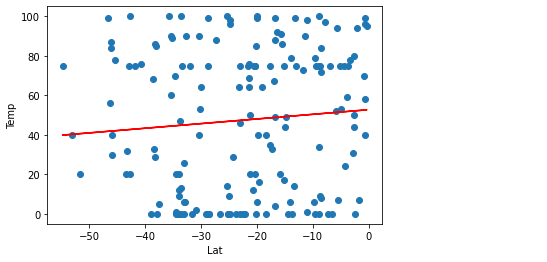

In [47]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvscloudiness_regress2.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.018612611039392976


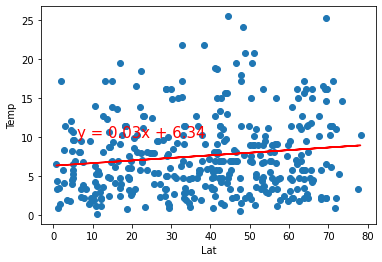

In [48]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvswind_regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.005194366356202566


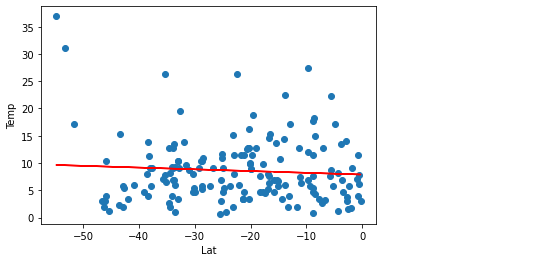

In [49]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvswind_regress2.png")
plt.show()